In [2]:
# !unzip /Users/priyanshu.tuli/Desktop/machinehack/cycle_rental_forecast/Dataset.zip

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_excel("/Users/priyanshu.tuli/Desktop/machinehack/cycle_rental_forecast/Dataset/Train.xlsx")

In [5]:
df.columns

Index(['Unnamed: 0', 'St_Hour', 'St_Day', 'St_Month', 'St_Year', 'User_type',
       'Datetime', 'Rental_Bicycles_Count'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime,Rental_Bicycles_Count
0,0,0,1,1,2013,occasional,2013-01-01 00:00:00,20
1,1,0,1,1,2013,subscribed,2013-01-01 00:00:00,26
2,2,1,1,1,2013,occasional,2013-01-01 01:00:00,23
3,3,1,1,1,2013,subscribed,2013-01-01 01:00:00,23
4,4,2,1,1,2013,occasional,2013-01-01 02:00:00,20


In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.head()

,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime,Rental_Bicycles_Count
0,0,1,1,2013,occasional,2013-01-01 00:00:00,20
1,0,1,1,2013,subscribed,2013-01-01 00:00:00,26
2,1,1,1,2013,occasional,2013-01-01 01:00:00,23
3,1,1,1,2013,subscribed,2013-01-01 01:00:00,23
4,2,1,1,2013,occasional,2013-01-01 02:00:00,20


In [9]:
df.shape

(59709, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59709 entries, 0 to 59708
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   St_Hour                59709 non-null  int64         
 1   St_Day                 59709 non-null  int64         
 2   St_Month               59709 non-null  int64         
 3   St_Year                59709 non-null  int64         
 4   User_type              59709 non-null  object        
 5   Datetime               59709 non-null  datetime64[ns]
 6   Rental_Bicycles_Count  59709 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 3.2+ MB


In [11]:
df["User_type"].value_counts() / df.shape[0] * 100

User_type
subscribed    50.039358
occasional    49.960642
Name: count, dtype: float64

In [12]:
df["Datetime"].max()

Timestamp('2016-05-31 23:00:00')

In [13]:
df["Datetime"].min()

Timestamp('2013-01-01 00:00:00')

In [14]:
df.sort_values(by="Datetime", ascending=True, inplace=True)

In [15]:
df_occasional = df.loc[df["User_type"] == "occasional", ["Datetime", "Rental_Bicycles_Count"]]

In [16]:
df_occasional.shape

(29831, 2)

In [17]:
df_occasional.head()

,Datetime,Rental_Bicycles_Count
0,2013-01-01 00:00:00,20
2,2013-01-01 01:00:00,23
4,2013-01-01 02:00:00,20
6,2013-01-01 03:00:00,9
8,2013-01-01 04:00:00,7


In [18]:
df_occasional["time_diff"] = df_occasional["Datetime"] - df_occasional["Datetime"].shift(1)
df_occasional["time_diff"] = df_occasional["time_diff"].dt.total_seconds() / 3600

In [19]:
df_occasional["time_diff"].value_counts()

time_diff
1.0    29741
2.0       82
3.0        6
4.0        1
Name: count, dtype: int64

In [20]:
df_occasional.shape

(29831, 3)

In [21]:
df_occasional[df_occasional["time_diff"] > 1]

,Datetime,Rental_Bicycles_Count,time_diff
147,2013-01-04 03:00:00,3,2.0
289,2013-01-07 03:00:00,4,2.0
957,2013-01-21 04:00:00,3,2.0
1003,2013-01-22 04:00:00,7,2.0
1098,2013-01-24 04:00:00,4,2.0
...,...,...,...
53816,2016-01-30 03:00:00,4,2.0
55207,2016-02-28 03:00:00,2,2.0
55256,2016-02-29 04:00:00,2,2.0
55493,2016-03-05 03:00:00,2,2.0


In [22]:
df_occasional["time_diff"].fillna(0, inplace=True)

/var/folders/pw/wmjkx07d5bj7gwx0bm5zkdjm0000gp/T/ipykernel_80938/2121884388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_occasional["time_diff"].fillna(0, inplace=True)


In [23]:
df_occasional = df_occasional.loc[df_occasional["time_diff"] <= 1, ["Datetime", "Rental_Bicycles_Count"]].set_index("Datetime")

In [24]:
df_occasional.head()

,Rental_Bicycles_Count
Datetime,
2013-01-01 00:00:00,20
2013-01-01 01:00:00,23
2013-01-01 02:00:00,20
2013-01-01 03:00:00,9
2013-01-01 04:00:00,7


In [25]:
df_occasional.shape

(29742, 1)

In [26]:
df_subscribed = df.loc[df["User_type"] == "subscribed", ["Datetime", "Rental_Bicycles_Count"]]

In [27]:
df_subscribed.head()

,Datetime,Rental_Bicycles_Count
1,2013-01-01 00:00:00,26
3,2013-01-01 01:00:00,23
5,2013-01-01 02:00:00,28
7,2013-01-01 03:00:00,7
9,2013-01-01 04:00:00,5


In [28]:
df_subscribed.shape

(29878, 2)

In [29]:
df_subscribed["time_diff"] = df_subscribed["Datetime"] - df_subscribed["Datetime"].shift(1)
df_subscribed["time_diff"] = df_subscribed["time_diff"].dt.total_seconds() / 3600

In [30]:
df_subscribed["time_diff"].value_counts()

time_diff
1.0    29834
2.0       37
3.0        5
4.0        1
Name: count, dtype: int64

In [31]:
df_subscribed["time_diff"].fillna(0, inplace=True)

/var/folders/pw/wmjkx07d5bj7gwx0bm5zkdjm0000gp/T/ipykernel_80938/728619319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subscribed["time_diff"].fillna(0, inplace=True)


In [32]:
df_subscribed = df_subscribed.loc[df_subscribed["time_diff"] <= 1, ["Datetime", "Rental_Bicycles_Count"]].set_index("Datetime")

In [33]:
df_subscribed.head()

,Rental_Bicycles_Count
Datetime,
2013-01-01 00:00:00,26
2013-01-01 01:00:00,23
2013-01-01 02:00:00,28
2013-01-01 03:00:00,7
2013-01-01 04:00:00,5


In [34]:
df_subscribed.shape

(29835, 1)

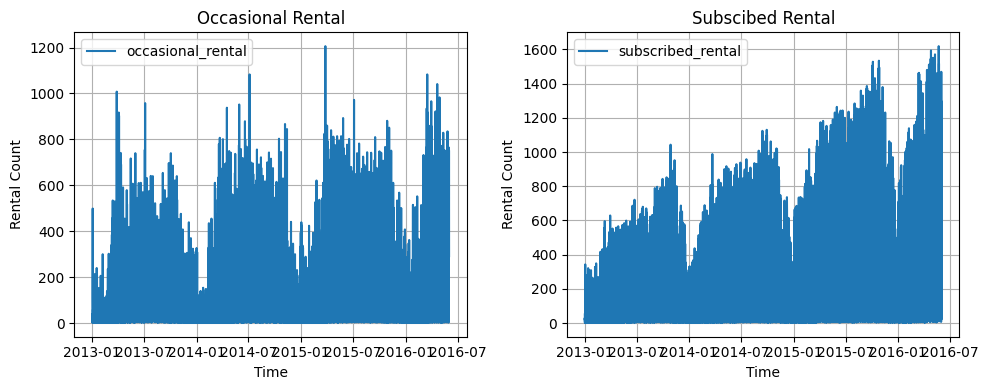

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(df_occasional, label="occasional_rental")
ax1.set_xlabel('Time')
ax1.set_ylabel("Rental Count")
ax1.set_title("Occasional Rental")
ax2.plot(df_subscribed, label="subscribed_rental")
ax2.set_xlabel('Time')
ax2.set_ylabel("Rental Count")
ax2.set_title("Subscibed Rental")
ax1.legend()
ax2.legend()
ax1.grid(True)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [36]:
df_subscribed.head()

,Rental_Bicycles_Count
Datetime,
2013-01-01 00:00:00,26
2013-01-01 01:00:00,23
2013-01-01 02:00:00,28
2013-01-01 03:00:00,7
2013-01-01 04:00:00,5


In [37]:
type(df_occasional.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [38]:
result_add_subscribed = seasonal_decompose(df_subscribed, model='additive', period=24)

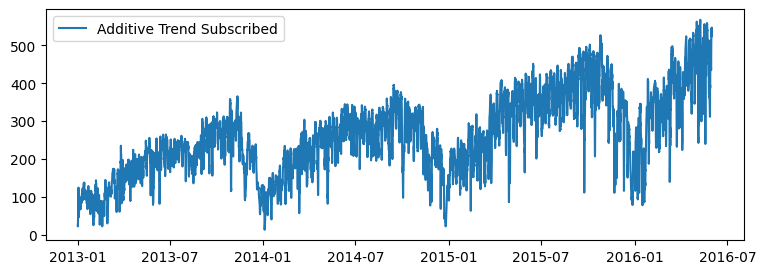

In [39]:
  
plt.figure(figsize=(9, 3))
 
plt.plot(result_add_subscribed.trend, label='Additive Trend Subscribed')
plt.legend()
plt.show()

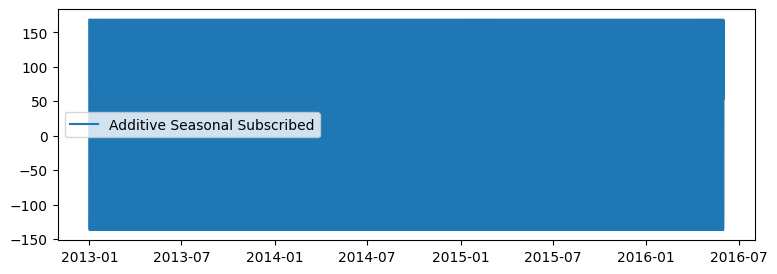

In [40]:
plt.figure(figsize=(9, 3))
 
plt.plot(result_add_subscribed.seasonal, label='Additive Seasonal Subscribed')
plt.legend()
plt.show()

In [41]:
df_subscribed["Rental_Bicycles_Count"].value_counts()

Rental_Bicycles_Count
11      282
8       281
12      281
7       270
10      267
       ... 
874       1
916       1
1055      1
1352      1
1090      1
Name: count, Length: 1255, dtype: int64

In [42]:
df_subscribed["Rental_Bicycles_Count"].min()

np.int64(1)

In [43]:
df_subscribed["Rental_Bicycles_Count"].max()

np.int64(1619)

In [44]:
df_subscribed["Seasonal First Differencing"] = df_subscribed["Rental_Bicycles_Count"] - df_subscribed["Rental_Bicycles_Count"].shift(24)

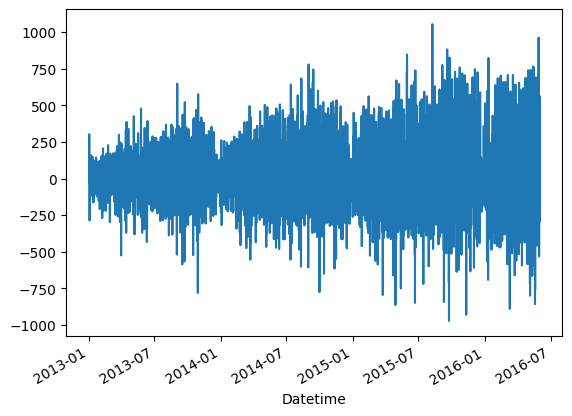

In [45]:
df_subscribed["Seasonal First Differencing"].plot()
plt.show()

In [46]:
df_subscribed.columns

Index(['Rental_Bicycles_Count', 'Seasonal First Differencing'], dtype='object')

In [47]:
result_multiplicative_subscribed = seasonal_decompose(df_subscribed["Rental_Bicycles_Count"], model='multiplicative', period=24)

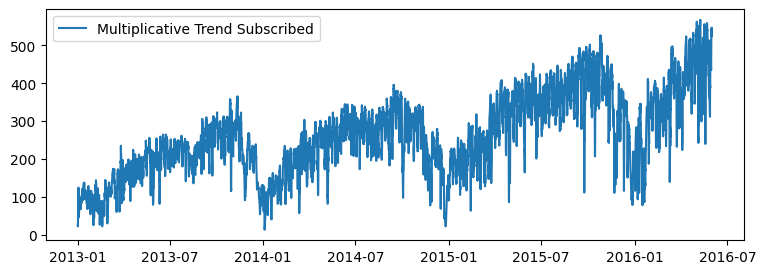

In [48]:
plt.figure(figsize=(9, 3))
 
plt.plot(result_multiplicative_subscribed.trend, label='Multiplicative Trend Subscribed')
plt.legend()

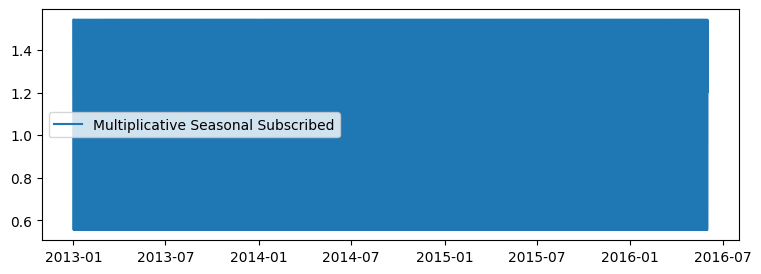

In [49]:
plt.figure(figsize=(9, 3))
 
plt.plot(result_multiplicative_subscribed.seasonal, label='Multiplicative Seasonal Subscribed')
plt.legend()
plt.show()

In [50]:
sma_window = 24
sma_subscribed = df_subscribed.rolling(window=sma_window).mean()

In [51]:
ema_window = 24*7
ema_subscribed = df_subscribed.ewm(span=ema_window).mean()

In [52]:
ema_subscribed

,Rental_Bicycles_Count,Seasonal First Differencing
Datetime,,
2013-01-01 00:00:00,26.000000,NaN
2013-01-01 01:00:00,24.491071,NaN
2013-01-01 02:00:00,25.674666,NaN
2013-01-01 03:00:00,20.922302,NaN
2013-01-01 04:00:00,17.661572,NaN
...,...,...
2016-05-31 19:00:00,492.679430,18.991991
2016-05-31 20:00:00,494.624052,17.571967
2016-05-31 21:00:00,495.030868,17.387684


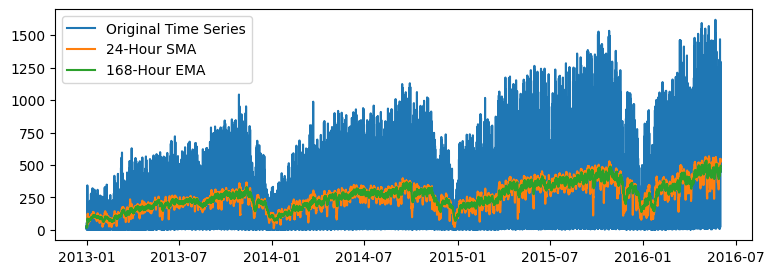

In [53]:
plt.figure(figsize=(9, 3))
plt.plot(df_subscribed["Rental_Bicycles_Count"], label='Original Time Series')
plt.plot(sma_subscribed["Rental_Bicycles_Count"], label=f'{sma_window}-Hour SMA')
plt.plot(ema_subscribed["Rental_Bicycles_Count"], label=f'{ema_window}-Hour EMA')
plt.legend()
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
res = adfuller(df_subscribed["Rental_Bicycles_Count"].values)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -7.241683
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [56]:
res = adfuller(df_subscribed['Seasonal First Differencing'].dropna().values)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -28.802155
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [79]:
res = adfuller(df_occasional["Rental_Bicycles_Count"].values)
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -11.348984
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [57]:
# df_subscribed.drop(columns="Seasonal First Differencing", inplace=True)

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

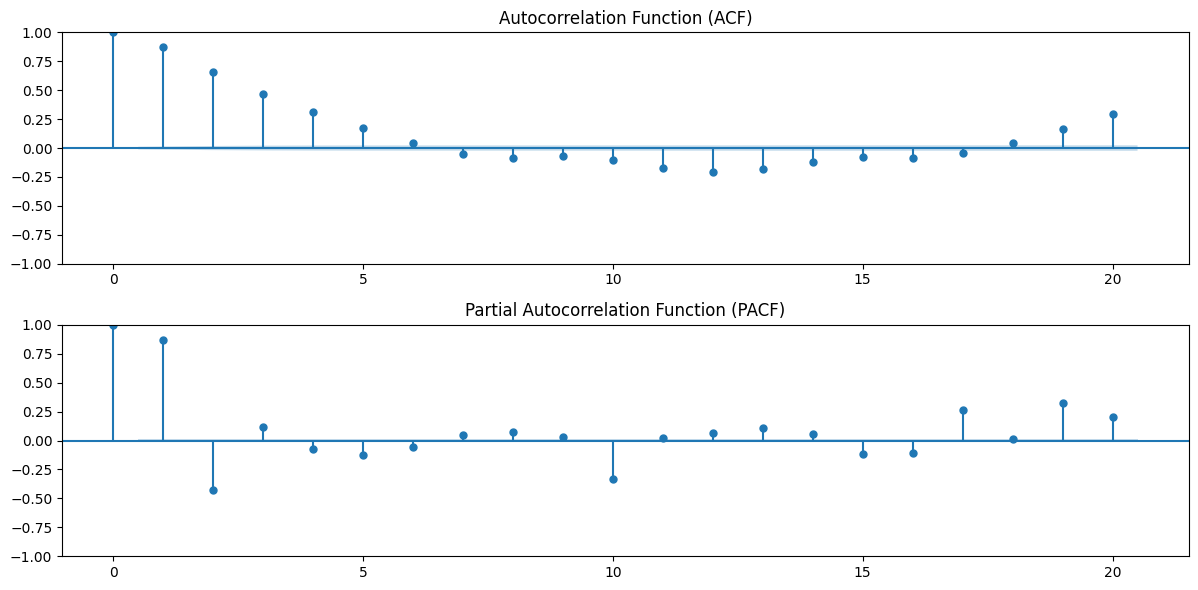

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(df_subscribed["Rental_Bicycles_Count"], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plotting the PACF
plt.subplot(212)
plot_pacf(df_subscribed["Rental_Bicycles_Count"], lags=20, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

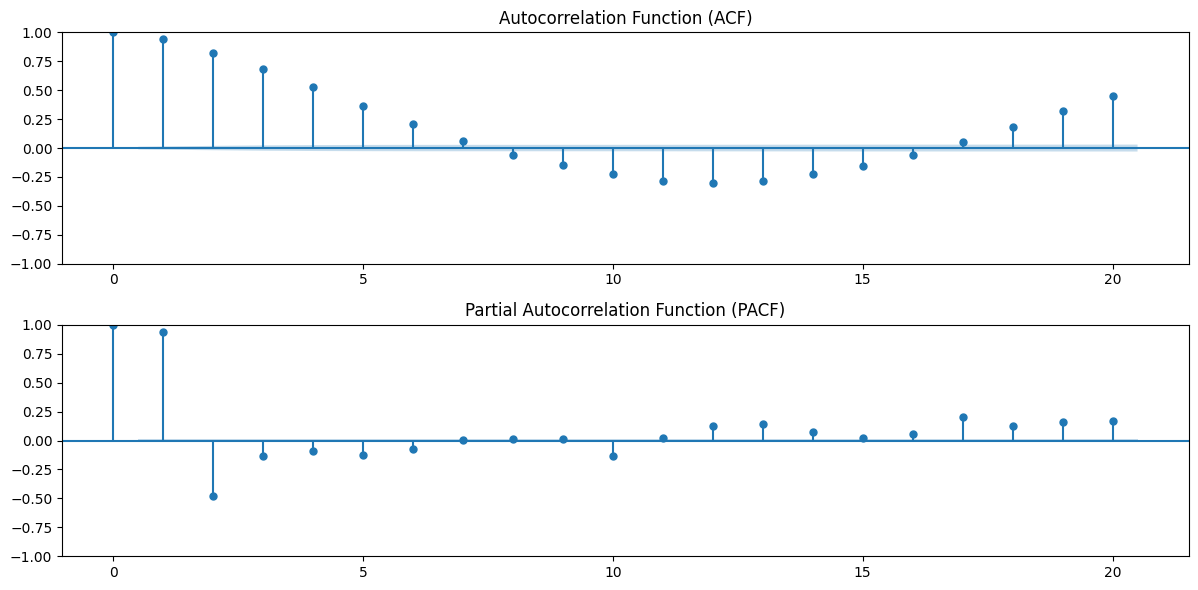

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(df_occasional, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plotting the PACF
plt.subplot(212)
plot_pacf(df_occasional, lags=20, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [60]:
import statsmodels.api as sm

In [82]:
model = sm.tsa.statespace.SARIMAX(df_subscribed["Rental_Bicycles_Count"], order=(2, 0, 0), seasonal_order=(2, 0, 0, 24))

/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88407D+00    |proj g|=  6.42368D-02


 This problem is unconstrained.



At iterate    5    f=  5.85191D+00    |proj g|=  8.09853D-02

At iterate   10    f=  5.83981D+00    |proj g|=  5.18857D-03

At iterate   15    f=  5.78861D+00    |proj g|=  4.63087D-02

At iterate   20    f=  5.74976D+00    |proj g|=  6.89396D-03

At iterate   25    f=  5.70852D+00    |proj g|=  5.62418D-02

At iterate   30    f=  5.69910D+00    |proj g|=  4.00409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     50      1     0     0   9.341D-06   5.699D+00
  F =   5.6990995244176945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Rental_Bicycles_Count   No. Observations:                29835
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood             -170032.634
Date:                            Sun, 25 Aug 2024   AIC                         340075.269
Time:                                    20:50:06   BIC                         340116.786
Sample:                                         0   HQIC                        340088.593
                                          - 29835                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0400      0.003    360.695      0.000       1.034       1.046
ar.L2         -0.2760      0.004    -65.725      0.000      -0.284      -0.268
ar.S.L24       0.8166      0.003    253.361      0.000       0.810       0.823
ar.S.L48       0.0040      0.003      1.212      0.226      -0.002       0.011
sigma2      5215.4617     18.323    284.633      0.000    5179.548    5251.375
===================================================================================
Ljung-Box (L1) (Q):                   2.39   Jarque-Bera (JB):            116849.00
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               3.52   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
model = sm.tsa.statespace.SARIMAX(df_occasional, order=(2, 0, 0), seasonal_order=(2, 0, 0, 24))
results = model.fit()
results.summary()

/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34507D+00    |proj g|=  1.75682D-01

At iterate    5    f=  5.28057D+00    |proj g|=  1.51230D-01

At iterate   10    f=  5.25673D+00    |proj g|=  5.82355D-03

At iterate   15    f=  5.25132D+00    |proj g|=  3.58260D-02

At iterate   20    f=  5.24669D+00    |proj g|=  1.49977D-02

At iterate   25    f=  5.23438D+00    |proj g|=  1.48427D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              Rental_Bicycles_Count   No. Observations:                29742
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood             -155680.581
Date:                            Sun, 25 Aug 2024   AIC                         311371.163
Time:                                    20:52:20   BIC                         311412.664
Sample:                                         0   HQIC                        311384.485
                                          - 29742                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1645      0.003    340.512      0.000       1.158       1.171
ar.L2         -0.2554      0.004    -72.698      0.000      -0.262      -0.249
ar.S.L24       0.4672      0.003    135.661      0.000       0.460       0.474
ar.S.L48       0.1614      0.004     41.282      0.000       0.154       0.169
sigma2      2059.9663      8.638    238.477      0.000    2043.036    2076.897
===================================================================================
Ljung-Box (L1) (Q):                  47.04   Jarque-Bera (JB):             41787.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
test_df = pd.read_excel("/Users/priyanshu.tuli/Desktop/machinehack/cycle_rental_forecast/Dataset/Test.xlsx")

In [86]:
test_df.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime
0,0,0,1,6,2016,occasional,2016-06-01 00:00:00
1,1,0,1,6,2016,subscribed,2016-06-01 00:00:00
2,2,1,1,6,2016,occasional,2016-06-01 01:00:00
3,3,1,1,6,2016,subscribed,2016-06-01 01:00:00
4,4,2,1,6,2016,occasional,2016-06-01 02:00:00


In [87]:
test_df.info

<bound method DataFrame.info of       Unnamed: 0  St_Hour  St_Day  St_Month  St_Year   User_type  \
0              0        0       1         6     2016  occasional   
1              1        0       1         6     2016  subscribed   
2              2        1       1         6     2016  occasional   
3              3        1       1         6     2016  subscribed   
4              4        2       1         6     2016  occasional   
...          ...      ...     ...       ...      ...         ...   
1435        1435       21      30         6     2016  subscribed   
1436        1436       22      30         6     2016  occasional   
1437        1437       22      30         6     2016  subscribed   
1438        1438       23      30         6     2016  occasional   
1439        1439       23      30         6     2016  subscribed   

                Datetime  
0    2016-06-01 00:00:00  
1    2016-06-01 00:00:00  
2    2016-06-01 01:00:00  
3    2016-06-01 01:00:00  
4    2016-06-01 

In [88]:
test_df["Datetime"].min()

Timestamp('2016-06-01 00:00:00')

In [89]:
test_df["Datetime"].max()

Timestamp('2016-06-30 23:00:00')

In [90]:
df_subscribed.index.max()

Timestamp('2016-05-31 23:00:00')

In [91]:
test_df["User_type"].value_counts()

User_type
occasional    720
subscribed    720
Name: count, dtype: int64

In [92]:
test_df.set_index("Datetime", inplace=True)

In [93]:
forecast_subscribed = results.get_forecast(steps=30 * 24)

/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [94]:
forecast_subscribed.conf_int()

,lower Rental_Bicycles_Count,upper Rental_Bicycles_Count
29835,197.520708,480.610667
29836,20.954469,429.381656
29837,-90.559072,377.216433
29838,-154.884340,338.185931
29839,-188.779498,314.169297
...,...,...
30550,-441.534190,446.424576
30551,-442.175636,445.783130
30552,-442.528162,445.430604
30553,-442.731492,445.227274


In [95]:
forecast_subscribed.predicted_mean.values

array([3.39065688e+02, 2.25168062e+02, 1.43328680e+02, 9.16507954e+01,
       6.26948995e+01, 9.39866947e+01, 2.14291385e+02, 4.92860505e+02,
       7.25237125e+02, 5.38198717e+02, 3.81704224e+02, 4.24663490e+02,
       4.97363881e+02, 5.18359260e+02, 5.42859009e+02, 7.15973809e+02,
       8.37647126e+02, 1.06427588e+03, 8.95424933e+02, 7.31462218e+02,
       5.39579472e+02, 4.34121575e+02, 3.73296390e+02, 3.68435006e+02,
       2.77387274e+02, 1.84116093e+02, 1.17169670e+02, 7.49308381e+01,
       5.12880254e+01, 7.70871595e+01, 1.75975783e+02, 4.04861150e+02,
       5.95782739e+02, 4.42139310e+02, 3.13579961e+02, 3.48875240e+02,
       4.08603014e+02, 4.25853182e+02, 4.45981238e+02, 5.88201808e+02,
       6.88159982e+02, 8.74339440e+02, 7.35621003e+02, 6.00922619e+02,
       4.43282948e+02, 3.56647320e+02, 3.06677603e+02, 3.02687497e+02,
       2.27888385e+02, 1.51261606e+02, 9.62615339e+01, 6.15599005e+01,
       4.21358491e+01, 6.33302302e+01, 1.44570193e+02, 3.32606831e+02,
      

In [101]:
forecast_occasional= results.get_forecast(steps=30 * 24)
forecast_subscribed.predicted_mean.values

/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


array([3.39065688e+02, 2.25168062e+02, 1.43328680e+02, 9.16507954e+01,
       6.26948995e+01, 9.39866947e+01, 2.14291385e+02, 4.92860505e+02,
       7.25237125e+02, 5.38198717e+02, 3.81704224e+02, 4.24663490e+02,
       4.97363881e+02, 5.18359260e+02, 5.42859009e+02, 7.15973809e+02,
       8.37647126e+02, 1.06427588e+03, 8.95424933e+02, 7.31462218e+02,
       5.39579472e+02, 4.34121575e+02, 3.73296390e+02, 3.68435006e+02,
       2.77387274e+02, 1.84116093e+02, 1.17169670e+02, 7.49308381e+01,
       5.12880254e+01, 7.70871595e+01, 1.75975783e+02, 4.04861150e+02,
       5.95782739e+02, 4.42139310e+02, 3.13579961e+02, 3.48875240e+02,
       4.08603014e+02, 4.25853182e+02, 4.45981238e+02, 5.88201808e+02,
       6.88159982e+02, 8.74339440e+02, 7.35621003e+02, 6.00922619e+02,
       4.43282948e+02, 3.56647320e+02, 3.06677603e+02, 3.02687497e+02,
       2.27888385e+02, 1.51261606e+02, 9.62615339e+01, 6.15599005e+01,
       4.21358491e+01, 6.33302302e+01, 1.44570193e+02, 3.32606831e+02,
      

In [96]:
len(forecast_subscribed.predicted_mean.values)

720

In [109]:
import numpy as np

In [110]:
test_df.loc[test_df["User_type"] == "subscribed", "Rent_Bicycles_Count"] = np.round(forecast_subscribed.predicted_mean.values)

In [111]:
test_df.loc[test_df["User_type"] == "occasional", "Rent_Bicycles_Count"] = np.round(forecast_occasional.predicted_mean.values)

In [112]:
test_df["Rent_Bicycles_Count"]

Datetime
2016-06-01 00:00:00    244.0
2016-06-01 00:00:00    339.0
2016-06-01 01:00:00    211.0
2016-06-01 01:00:00    225.0
2016-06-01 02:00:00    177.0
                       ...  
2016-06-30 21:00:00      1.0
2016-06-30 22:00:00      0.0
2016-06-30 22:00:00      1.0
2016-06-30 23:00:00      0.0
2016-06-30 23:00:00      1.0
Name: Rent_Bicycles_Count, Length: 1440, dtype: float64

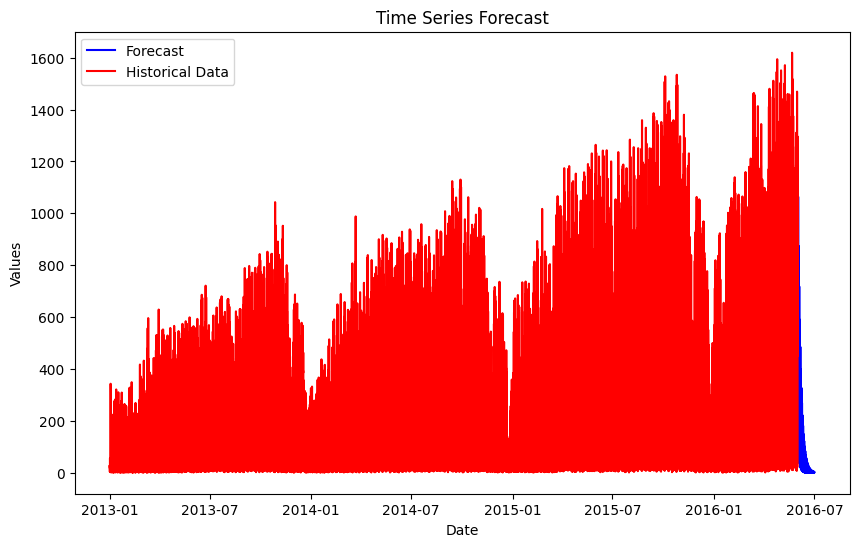

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(test_df["Rent_Bicycles_Count"], label='Forecast', color='blue')
plt.plot(df_subscribed["Rental_Bicycles_Count"], label='Historical Data', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [117]:
output = test_df["Rent_Bicycles_Count"]

In [118]:
output

Datetime
2016-06-01 00:00:00    244.0
2016-06-01 00:00:00    339.0
2016-06-01 01:00:00    211.0
2016-06-01 01:00:00    225.0
2016-06-01 02:00:00    177.0
                       ...  
2016-06-30 21:00:00      1.0
2016-06-30 22:00:00      0.0
2016-06-30 22:00:00      1.0
2016-06-30 23:00:00      0.0
2016-06-30 23:00:00      1.0
Name: Rent_Bicycles_Count, Length: 1440, dtype: float64

In [119]:
output.name = "Rental_Bicycles_Count"

In [122]:
output = output.astype(int)

In [123]:
output

Datetime
2016-06-01 00:00:00    244
2016-06-01 00:00:00    339
2016-06-01 01:00:00    211
2016-06-01 01:00:00    225
2016-06-01 02:00:00    177
                      ... 
2016-06-30 21:00:00      1
2016-06-30 22:00:00      0
2016-06-30 22:00:00      1
2016-06-30 23:00:00      0
2016-06-30 23:00:00      1
Name: Rental_Bicycles_Count, Length: 1440, dtype: int64

In [124]:
output.to_csv("./submission.csv", index=False)